# 5 Pythonによる科学計算の基礎（NumpyとScipy）

- **[5.1 概要](#5.1-概要)**
    - [5.1.1 この章の概要について](#5.1.1-この章の概要について)
<br><br>
- **[5.2 Numpy](#5.2-Numpy)**
    - [5.2.1 インデックス参照](#5.2.1-インデックス参照)
    - [5.2.2 Numpyの演算処理](#5.2.2-Numpyの演算処理)
    - [5.2.3 配列操作とブロードキャスト](#5.2.3-配列操作とブロードキャスト)
<br><br>
- **[5.3 Scipy](#5.3-Scipy)**
    - [5.3.1 補間](#5.3.1-補間)
    - [5.3.2 線形代数：行列の分解](#5.3.2-線形代数：行列の分解)
    - [5.3.3 積分と微分方程式](#5.3.3-積分と微分方程式)
    - [5.3.4 最適化](#5.3.4-最適化)
<br><br>
- **[5.4 総合問題](#5.4-総合問題)**
    - [5.4.1 総合問題1](#5.4.1-総合問題1)
    - [5.4.2 総合問題2](#5.4.2-総合問題2)
    - [5.4.3 総合問題3](#5.4.3-総合問題3)

***

## 5.1 概要
ゴール：NumpyやScipyを使ったデータの生成や基本的な科学的計算方法を知る

### 5.1.1 この章の概要について
キーワード：Numpy,Scipy

これまで、Pythonの基礎的なテクニックや代表的な科学技術計算モジュールNumpy、Scipyの基本的な使い方を学びました。この章では、これらのモジュールを引き続き使用し、さらに色々な計算テクニックを身に付けていきましょう。なお、前と同様に次のモジュールを使用するため、必ず以下のコードを実行してください。

In [1]:
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series,DataFrame
import pandas as pd

# 可視化モジュール
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 小数第３まで表示
%precision 3

'%.3f'

Numpyはインデックス参照やブロードキャストについて、Scipyについては線形代数や積分計算、最適化計算ができることを見ていきます。

本章と次の章は、データのハンドリングテクニック等がやや多くなります。最初はそれらのテクニックの必要性をあまり実感できませんが、各章の総合問題で実際のデータを使って、それらの手法を活用していただきます。しっかりと身につけていきましょう。

以下の文献が参考になります。

>[参考文献]

>『科学技術計算のためのPython入門 ――開発基礎、必須ライブラリ、高速化』（中久喜 健司 (著)、技術評論社）

>『Python言語によるビジネスアナリティクス 実務家のための最適化・統計解析・機械学習』（久保 幹雄  (著), 小林 和博 (著), 斉藤 努 (著), 並木 誠 (著), 橋本 英樹 (著)、近代科学社 ）

>『Pythonによるデータ分析入門 ―NumPy、pandasを使ったデータ処理』（Wes McKinney (著), 小林 儀匡 (翻訳), 鈴木 宏尚 (翻訳), 瀬戸山 雅人  (翻訳)、滝口開資(翻訳)、野上大介(翻訳)、オライリージャパン）

なお、本章にあるScipyの単元は、数学的に少し高度なものを扱っています。おそらくこれらは理系の大学3〜4年生までに習うレベルのもので、初見の方はすぐに理解できなくても大丈夫です。後の章で全てを使うわけではないので、線形代数（行列分解など）、微分方程式、最適化計算（線形計画法）等をまだやっていない方は、詳細は理解できなくても大丈夫です。ここで扱った理由は、これらの分野を学んできた人（理論のみ）が、Cや他の言語では大変な科学計算の実装を，Pythonを使ってもっと気軽に実装するにはどうすればいいのかを知ってもらうためです。データサイエンスの現場や研究等で、これらの分野（微分方程式、最適化計算など）を使う必要がでてきた時に、ぜひScipyを使うことを検討してみてください。

***

## 5.2 Numpy
ゴール：Numpyのインデックス参照やブロードキャストなど、配列に関する応用的な処理を実行できるようになる

### 5.2.1 インデックス参照
キーワード：インデックス参照、スライス、ビュー

以前の章でNumpyの使い方について、配列計算など基礎的なことを学びました。ここではさらに、応用的な操作を実施していきます。まずはインデックス参照です。データを準備します。

In [2]:
# データの準備
# 等間隔の数字
sample_array = np.arange(10)
print("sample_array:",sample_array)

sample_array: [0 1 2 3 4 5 6 7 8 9]


上記のように、0から9までの数字(配列)を準備します。以下では、その変数（sample_array）から新しい変数（sample_array_slice）を作成し、その中の一部を10で置き換えています。

その新しい変数をチェックすると、正しく変更されていることがわかります。しかし、実は元となる変数の要素も変更されるので注意しましょう。

In [3]:
# 元のデータ
print(sample_array)

# 前から数字を5つ取得して、sample_array_sliceに入れる（スライス）
sample_array_slice = sample_array[0:5]
print(sample_array_slice)

# sample_array_sliceの3文字目までは、10で置換
sample_array_slice[0:3] = 10
print(sample_array_slice)

# スライスの変更はオリジナルのリストの要素も変更されていることに注意
print(sample_array)

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4]
[10 10 10  3  4]
[10 10 10  3  4  5  6  7  8  9]


なお、オリジナルのデータを変更せずに、コピーする場合は、以下のようにcopyを使い、その変数（sample_array_copy）を加工していきましょう。

In [4]:
# copyして別のobjectを作成
sample_array_copy = np.copy(sample_array)
print(sample_array_copy)

sample_array_copy[0:3] = 20
print(sample_array_copy)

# オリジナルのリストの要素は変更されていない
print(sample_array)

[10 10 10  3  4  5  6  7  8  9]
[20 20 20  3  4  5  6  7  8  9]
[10 10 10  3  4  5  6  7  8  9]


次は、ブールインデックス参照です。これはその名の通り、bool(TrueかFalse)の役割を利用して、データを取り出しています。言葉で説明しても分かりにくいので、以下で具体例を見ていきます。

In [6]:
# データの準備
sample_names = np.array(['a','b','c','d','a'])
random.seed(0)
data = random.randn(5,5)

print(sample_names)
print(data)

['a' 'b' 'c' 'd' 'a']
[[ 1.764  0.4    0.979  2.241  1.868]
 [-0.977  0.95  -0.151 -0.103  0.411]
 [ 0.144  1.454  0.761  0.122  0.444]
 [ 0.334  1.494 -0.205  0.313 -0.854]
 [-2.553  0.654  0.864 -0.742  2.27 ]]


上で作成したデータ要素にて、以下の処理は、aに等しい箇所はTrue、そうでなければFalseになります。

In [7]:
sample_names == 'a'

array([ True, False, False, False,  True], dtype=bool)

上記のように、Trueになっている箇所を指定して、以下のようにデータを取り出していることがわかります。1番目と5番目がTrueなので、そのデータのみ抽出しています。これがブールインデックス参照です。

In [8]:
data[sample_names == 'a']

array([[ 1.764,  0.4  ,  0.979,  2.241,  1.868],
       [-2.553,  0.654,  0.864, -0.742,  2.27 ]])

次はブールを利用して、条件制御（np.whereを使用）しています。具体的には、cond_data変数の前2つがTrueなので、x_arrayのデータ前2つを取得し、次はFalseが2つ並んでいるので、そのインデックスと同じ要素をy_arrayからとっています。最後にTrueがあるので、こちらはまたx_arrayから最後の要素を取り出しています。最終行でそれらをまとめて表示しています。

In [5]:
# 条件制御のためのブールの配列
cond_data = np.array([True,True,False,False,True])

# 上記より、配列の1番目（1）、2番目（2）、5番目（5）の数字が出されます。
x_array= np.array([1,2,3,4,5])

# 上記より、配列の3番目（8）、4番目（9）の数字が出されます。
y_array= np.array([6,7,8,9,10])

# 条件制御実施
print(np.where(cond_data,x_array,y_array))

[1 2 8 9 5]


#### <練習問題 1>

上記データのsample_namesのbに該当するdataを抽出してください。

#### <練習問題 2>

上記データのsample_namesのc以外に該当するdataを抽出してください。

#### <練習問題 3>

上記のcond_dataを変更して、x_arrayの3番目と4番目、y_arrayの1番、2番、5番目を出すように、条件制御を実施してください。

### 5.2.2 Numpyの演算処理
キーワード：ユニバーサル関数

ここでは、Numpyの演算処理について学びます。次は、uniqueを使って重複を削除しています。

In [6]:
# 重複あり
print(cond_data)

# 重複削除
print(np.unique(cond_data))

[ True  True False False  True]
[False  True]


次に、ユニバーサル関数です。すべての要素に関数を適応することができます。具体的には、以下では、平方根計算を1つ1つの要素で計算しています。

In [7]:
# ユニバーサル関数
sample_data = np.arange(10)
print("すべての要素に平方根：",np.sqrt(sample_data))
print("すべての要素にExp：",np.exp(sample_data))

すべての要素に平方根： [ 0.     1.     1.414  1.732  2.     2.236  2.449  2.646  2.828  3.   ]
すべての要素にExp： [  1.000e+00   2.718e+00   7.389e+00   2.009e+01   5.460e+01   1.484e+02
   4.034e+02   1.097e+03   2.981e+03   8.103e+03]


Pandasでも実施しましたが、Numpyでも平均や最大値等の計算ができます。axisで行か列の指定が可能です。

In [8]:
# 統計関数（PandasでやったがNumpyでもできる、列、行の指定なども）
sample_multi_array_data1 = np.arange(9).reshape(3,3)

print(sample_multi_array_data1)

print("平均:",sample_multi_array_data1.mean())
print("最大値:",sample_multi_array_data1.max())
print("合計:",sample_multi_array_data1.sum())

# 行列の指定
print("行の合計:",sample_multi_array_data1.sum(axis=1))
print("列の合計:",sample_multi_array_data1.sum(axis=0))

[[0 1 2]
 [3 4 5]
 [6 7 8]]
平均: 4.0
最大値: 8
合計: 36
行の合計: [ 3 12 21]
列の合計: [ 9 12 15]


次は、真偽を判定したり、判定後の集計を実装しています。anyはいずれか少なくとも1つ満たすものがあればTrue、allはすべて満たす場合にTrueです。

In [9]:
# 真偽値の配列関数
print("Trueが少なくとも１つあるかどうか:",cond_data.any())
print("すべてTrueかどうか:",cond_data.all())
print("5より大きい数字がいくつあるか:",(sample_multi_array_data1>5).sum())

Trueが少なくとも１つあるかどうか: True
すべてTrueかどうか: False
5より大きい数字がいくつあるか: 3


最後に、行列の対角成分（行と列が同じ要素全て）の表示と和を計算しています。

In [10]:
# 行列計算
print("対角成分:",np.diag(sample_multi_array_data1))
print("対角成分の和:",np.trace(sample_multi_array_data1))

対角成分: [0 4 8]
対角成分の和: 12


#### <練習問題 1>

以下のデータに対して、すべての要素の平方根を計算した行列を表示してください。

In [11]:
sample_multi_array_data2 = np.arange(16).reshape(4,4)
sample_multi_array_data2 

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

#### <練習問題 2>

上記のデータsample_multi_array_data2の最大値、最小値、合計値、平均値を求めてください。

#### <練習問題 3>

上記のデータsample_multi_array_data2の対角成分の和を求めてください。

### 5.2.3 配列操作とブロードキャスト
キーワード：再形成、結合と分割、リピート、ブロードキャスト

Numpyでは再形成といって、行列の次元を変更することが可能です。

In [12]:
# データの準備
sample_array = np.arange(10)
sample_array

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

reshapeを使うことで、次のように変更できます。

In [13]:
# 再形成
sample_array2 = sample_array.reshape(2,5)
sample_array2

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [14]:
sample_array2.reshape(5,2)

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

concatenateを使って、データの結合することが可能です。axisで行方向か、縦方向を指定できす。以下は0で行方向に結合しています。

In [15]:
#　データの準備
sample_array3 = np.array([[1,2,3],[4,5,6]])
sample_array4 = np.array([[7,8,9],[10,11,12]])

# 行方向に結合
np.concatenate([sample_array3,sample_array4],axis=0)

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

vstackでも行方向の結合が可能です。

In [16]:
# 行方向結合の他の方法
np.vstack((sample_array3,sample_array4))

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

列方向はaxisに1を設定します。

In [17]:
# 列方向に結合
np.concatenate([sample_array3,sample_array4],axis=1)

array([[ 1,  2,  3,  7,  8,  9],
       [ 4,  5,  6, 10, 11, 12]])

hstackで列方向の結合が可能です。

In [18]:
# 列方向結合の他の方法
np.hstack((sample_array3,sample_array4))

array([[ 1,  2,  3,  7,  8,  9],
       [ 4,  5,  6, 10, 11, 12]])

次は、配列の分割です。splitで分割をします。

>[参考URL]

>https://docs.scipy.org/doc/numpy/reference/generated/numpy.split.html

In [19]:
# データの用意
sample_array_vstack = np.vstack((sample_array3,sample_array4))

# 分割([1,3]は、上記参考URLのindices_or_sections を参照
first,second,third=np.split(sample_array_vstack,[1,3])

In [20]:
# 元のデータ
sample_array_vstack

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

[1,3]でパラメータを設定しており、これをベースに分割します。具体的には~1(1の手前全て)、1~3(1から3の手前のみ)、3~(3以降全て)のインデックスで取り出しています。

In [21]:
# 分割後1
print(first)

[[1 2 3]]


In [22]:
# 分割後2
print(second)

[[4 5 6]
 [7 8 9]]


In [23]:
second[0]

array([4, 5, 6])

In [24]:
# 分割後3
print(third)

[[10 11 12]]


これは若干わかりにくいので、もう1つ例をあげます。新しくデータを追加して、分割した例を見てみましょう。

In [25]:
# データの用意
sample_array5 = np.array([[13,14,15],[16,17,18],[19,20,21]])
sample_array_vstack2 = np.vstack((sample_array3,sample_array4,sample_array5))

# 分割パラメータは[2,3,5]なので、~1,2,3~4,5~の4つになります。
first,second,third,fourth=np.split(sample_array_vstack2,[2,3,5])

In [26]:
print("・1つ目：\n",first,'\n')
print("・2つ目：\n",second,'\n')
print("・3つ目：\n",third,'\n')
print("・4つ目：\n",fourth,'\n')

・1つ目：
 [[1 2 3]
 [4 5 6]] 

・2つ目：
 [[7 8 9]] 

・3つ目：
 [[10 11 12]
 [13 14 15]] 

・4つ目：
 [[16 17 18]
 [19 20 21]] 



要素を取り出すと以下のようになります。

In [27]:
first[0]

array([1, 2, 3])

In [28]:
first[1]

array([4, 5, 6])

次は、繰り返し処理です。repeatで各要素が繰り返し表示されます。

In [29]:
# リピート,各要素が繰り返される
first.repeat(5)

array([1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5,
       5, 5, 6, 6, 6, 6, 6])

最後に、**ブロードキャスト**です。これは、配列の大きさが異なっていれば、自動的に要素をコピーして大きさを揃える機能です。まずは0から9までのデータを準備します。

In [30]:
# データの準備
sample_array = np.arange(10)
print(sample_array)

[0 1 2 3 4 5 6 7 8 9]


次は、上記の配列に「3」を足す計算をしているのですが、要素をコピーして大きさを揃えて、配列の全ての要素に3を加えているのがわかります。sample_array + 3はsample_array + np.array([3,3,3,3,3,3,3,3,3,3])と同じ結果になります。

In [31]:
sample_array + 3

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

以上で、Numpyの単元は終了します。Numpyは他のライブラリーのベースとなっており、ここで紹介したテクニック以外にも、色々なデータハンドリングや概念があるので、上記の参考文献や以下のURLなどを参考にしてください。

>[参考URL]

>Numpy：https://docs.scipy.org/doc/numpy-dev/user/quickstart.html

#### <練習問題 1>

次の2つの配列に対して、縦に結合してみましょう。

In [32]:
# データの準備
sample_array1 = np.arange(12).reshape(3,4)
sample_array2 = np.arange(12).reshape(3,4)

#### <練習問題 2>

上記の2つの配列に対して、横に結合してみましょう。

#### <練習問題 3>

普通の以下のリストの各要素に3を加えるためにはどうすればよいでしょうか。Numpyのブロードキャスト機能を使ってください。

In [33]:
sample_list = [1,2,3,4,5]

***

## 5.3 Scipy
ゴール：Scipyで様々な科学計算（補間処理、積分、行列計算など）を知って、基本的な実装ができるようになる

### 5.3.1 補間
キーワード：線形補間、スプライン補間、interpolate

ここでは科学計算で活用されるScipyの使い方について学びます。補間や行列計算、積分計算、最適化（線形計画法の一部）を扱っていきます。他には高速フーリエ変換、信号処理、画像処理も計算することができます。もし、これらのアプローチを取る機会があれば、ぜひScipyの使用を検討してみてください。なお、冒頭にも述べたように、これらの分野を全く学んでない方は、こんな方法があるんだなと思うだけでよいので、適宜飛ばしてください。

参考文献としては、上記のNumpyで紹介した文献のScipyを扱った章や、以下のURLを参考にしてください。

>[参考URL]

>Scipy：https://www.scipy.org

まずは、補間計算です。以下のコードを実行して、グラフを描画してみましょう。

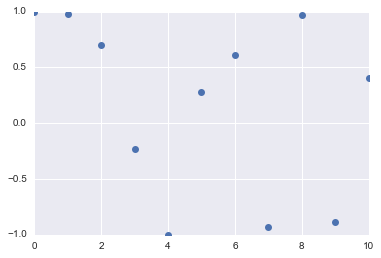

In [34]:
x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/5.0)
plt.plot(x,y,'o')
plt.grid(True)

左から順に点をたどっていくと、これは何かの曲線を表しているようにも見えます（もちろん、コード見ていただければわかる通り、cosの関数を使って描いています。しかし今回はわからないということにしてください）。ところで、xが4.5など、実点と実点の間にあるxに対応するyはどのような値になるのでしょうか？これを考えるのが補間計算です。scipyでは、1次元データに対する補間はinterp1dが用意されており、以下のように記述します。

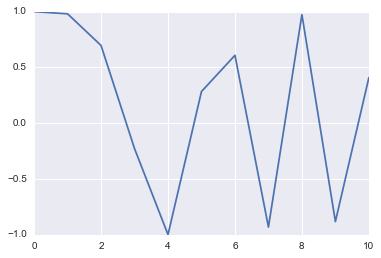

In [35]:
from scipy import interpolate

# 線形補間
f = interpolate.interp1d(x, y,'linear')
plt.plot(x,f(x),'-')
plt.grid(True)

次は、スプライン3次補間も加えて、グラフを見てみましょう。

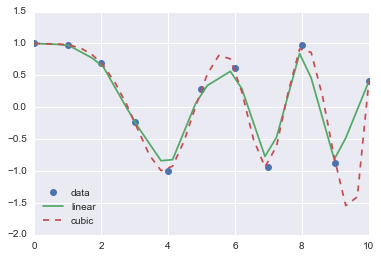

In [42]:
# スプライン3次補間も加えて、まとめてみる、
f2 = interpolate.interp1d(x, y,'cubic')

#曲線を出すために、xの値を細かくする。
xnew = np.linspace(0, 10, num=30, endpoint=True)

# グラフ化
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')

# 凡例
plt.legend(['data', 'linear', 'cubic'], loc='best')
plt.grid(True)

ただし、あくまでこの補間した曲線は現在のデータ全てを利用して曲線を引いており、これが新しい未知のデータに対して当てはまるとは限りません。このことは後の機械学習の章で学んでいきます。

>[参考URL]

>Scipyの補間計算：https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html

#### <練習問題 1>

以下のデータに対して、線形補間の計算をして、グラフを描いてください。

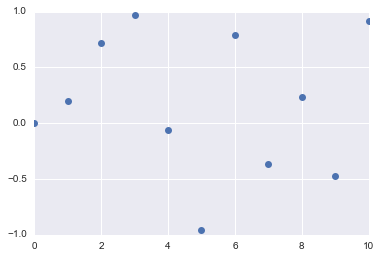

In [36]:
x = np.linspace(0, 10, num=11, endpoint=True)
y = np.sin(x**2/5.0)
plt.plot(x,y,'o')
plt.grid(True)

#### <練習問題 2>

2次元のスプライン補間をして上記のグラフに書き込んでください(2次元のスプライン補間はパラメタをquadraticとします。)

#### <練習問題 3>

3次元スプライン補間も加えてみましょう。

### 5.3.2 線形代数：行列の分解
キーワード：linalg、特異値分解、LU分解、コレスキー分解

ここでは、行列計算の応用を扱っていきます。なお、ここはこの講座でも難しい項目になりますので、大学で線形代数をやっていない方は、スキップしても大丈夫です。

まずは**特異値分解（singular value decomposition, SVD）**から見ていきましょう。固有値を計算していたときには、その行列が正方行列であることを前提としていましたが、特意値分解は正方行列ではない行列にも拡張したものと言えます。Aの特異値分解とは、

\begin{eqnarray}
A = U \sum V^*
\end{eqnarray}

のことをいいます。ここで、Vは$A^*A$(*は共役転置行列を表す)の固有ベクトルを列ベクトルとして並べた行列、Uは$AA^*$の固有ベクトルを列ベクトルとして並べた行列、$\sum$は特異値を対角に並べた行列とします。ただし、Aは(m,n)行列として、$AA^*$（ハミルトン行列）の固有値はせいぜい$min(m,n)$であり、それらの正の固有値を$\sigma^2_i$とした時、固有値の平方根$\sigma_i$を特異値といいます。

>[参考URL]

>特異値分解：https://ja.wikipedia.org/wiki/%E7%89%B9%E7%95%B0%E5%80%A4%E5%88%86%E8%A7%A3

具体的に計算をすると以下になります。ちなみに、@は行列の積を簡素化するための演算子です。（PythonやNumpyのバージョンによっては使えませんが、ilect上では大丈夫です。）

In [2]:
# (2,5)行列
A = np.array([[1,2,3,4,5],[6,7,8,9,10]])

# 特異値分解の関数linalg.svd
U, s, Vs = sp.linalg.svd(A)
m, n = A.shape

S = sp.linalg.diagsvd(s,m,n)

print("U.S.V* = \n",U@S@Vs)

U.S.V* = 
 [[ 1.  2.  3.  4.  5.]
 [ 6.  7.  8.  9. 10.]]


補足：ちなみに、この特異値分解は機械学習の章で学ぶリッジ回帰や主成分分析などと関係があります。さらに深層学習を学ぶ上でも行列分解は大事です。この講座では、細かい計算は追いませんが、頭の片隅において置いてください。

>[参考URL]

>Statistical Learning with Sparsity The Lasso and Generalizations:https://web.stanford.edu/~hastie/StatLearnSparsity_files/SLS.pdf

次は、**LU分解**です。Aを正方行列として、Ax = bを解く代わりに、PLUx = bを解くことで、効率よく解を求めることができます。置換行列P、対角成分がすべて1の下3角行列L、上3角行列UをA = PLU となるようにおきます。具体的な計算は次のようになります。

In [3]:
#データの準備
A = np.identity(5)
A[0,:] = 1
A[:,0] = 1
A[0,0] = 5
b = np.ones(5)

# 正方行列をLU分解する
(LU,piv) = sp.linalg.lu_factor(A)

L = np.identity(5) + np.tril(LU,-1)
U = np.triu(LU)
P = np.identity(5)[piv]

# 解を求める
x = sp.linalg.lu_solve((LU,piv),b)
x

array([-3.,  4.,  4.,  4.,  4.])

次は、**コレスキー分解**です。Aがエルミート行列で正定値の場合に、下3角行列L、共役転置$L^*$の積$A=LL^*$に分解し、方程式は$LL^*x = b$となり、これを解きます。

In [4]:
A = np.array([[7, -1, 0, 1],
              [-1, 9, -2, 2],
              [0, -2, 8, -3],
              [1, 2, -3, 10]])
b = np.array([5, 20, 0, 20])


L = sp.linalg.cholesky(A)

t = sp.linalg.solve(L.T.conj(), b)
x = sp.linalg.solve(L, t)

# 解答
print(x)

[ 0.758  2.168  1.241  1.863]


In [5]:
# 確認
np.dot(A,x)

array([  5.000e+00,   2.000e+01,   2.665e-15,   2.000e+01])

他には、QR分解等も可能です。ここでは割愛しますが、以下のURLなどを参考にしてください。

>[参考URL]

>Scipyの行列計算：https://docs.scipy.org/doc/scipy/reference/tutorial/linalg.html

以上でScipyを使った線形代数・行列の分解については終わりになります。

なお、行列分解の計算だけを見ていると何の役に立つのイメージしにくいのですが、実務的には商品のリコメンデーションなどに応用されています（非負値行列因子分解（NMF: Non-negative Matrix Factorization）など）。購買データを扱う際、1つ1つの購買（バスケット、購買ユーザー）に対して、各購入商品のフラグ付けをして行列にすることが多いのですが、ほとんど疎（スパース）な状態で、そのまま集計・分析をするとあまり意味のある結果が出ないことが多いです。そのため、次元削減するのに行列の分解の結果が使われます。なお、これらに関連する参考書としては、以下が参考になります。

>[参考文献]

>『岩波データサイエンス Vol.5、特集「スパースモデリングと多変量データ解析」』（岩波データサイエンス刊行委員会 (編集)、岩波書店）


ちなみに、非負値行列因子分解は、ある行列XをX≒WHと近似した時に、その近似後の行列W、Hの要素が全部正になるようにしており、以下の例はsklearnのdecompositionを使っています。

In [41]:
# NMFを使います
from sklearn.decomposition import NMF

# 分解対象行列
X = np.array([[1,1,1], [2,2,2],[3,3,3], [4,4,4]])

model = NMF(n_components=2, init='random', random_state=0)

W = model.fit_transform(X)
H = model.components_

In [42]:
W

array([[ 0.425,  0.222],
       [ 0.698,  0.537],
       [ 0.039,  1.434],
       [ 2.377,  0.463]])

In [43]:
H

array([[ 1.281,  1.281,  1.282],
       [ 2.058,  2.058,  2.058]])

In [44]:
np.dot(W, H) #W@Hでもよい

array([[ 1.,  1.,  1.],
       [ 2.,  2.,  2.],
       [ 3.,  3.,  3.],
       [ 4.,  4.,  4.]])

#### <練習問題 1>
以下の行列に対して、特異値分解をしてください。

In [45]:
B = np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])
B

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

#### <練習問題 2>
以下の行列に対して、LU分解をして、$Ax=b$の方程式を解いてください。

In [46]:
#データの準備
A = np.identity(3)
print(A)
A[0,:] = 1
A[:,0] = 1
A[0,0] = 3
b = np.ones(3)
print(A)
print(b)

[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]
[[ 3.  1.  1.]
 [ 1.  1.  0.]
 [ 1.  0.  1.]]
[ 1.  1.  1.]


### 5.3.3 積分と微分方程式
キーワード：数値積分、微分方程式、integrate

次は、積分計算です。Scipyを使えば、次の（数値）積分も求めることができます。

\begin{eqnarray}
  \int_0^1 \frac{4}{1+x^2} dx
\end{eqnarray}

これは実際は$\pi$（3.14..）に等しいですが、以下のコードで確かめていきましょう。積分計算は、integrate.quadを使います。

In [47]:
# 積分計算
from scipy import integrate
import math

次に上の関数をセットするため、関数を作成します。

In [ ]:
def calcPi(x):
    return 4/(1+x**2)

計算するためにintegrate.quadを使うのですが、上の関数を1つ目の引数、2つ目と3つ目の引数に積分範囲を設定します。

In [48]:
# 計算結果と推定誤差
integrate.quad(calcPi, 0, 1)

(3.142, 0.000)

以下は同じ処理を無名関数を使って実行しています。

In [49]:
# 無名関数で書くことも可能
integrate.quad(lambda x: 4/(1+x**2), 0, 1)

(3.142, 0.000)

どちらもほぼ3.14になっているのがわかると思います。

sin関数も求めてみましょう。

In [50]:
from numpy import sin
integrate.quad(sin, 0, math.pi/1)

(2.000, 0.000)

2重積分も計算できます。

\begin{eqnarray*}
  && \int_0^\infty \!\!\! \int_1^\infty \frac{\mathrm{e}^{-xt}}{t^n}  dtdx \\
  && 
\end{eqnarray*}

もちろんこれも手計算で実施可能で、$\frac{1}{n}$になりますが、integrate.dblquadを使って、確かめましょう。ただし、コンピューターの数値計算なので、前と同様に完全に一致することはなく、誤差が生じます。

In [1]:
# 2重積分
def I(n):
    return integrate.dblquad(lambda t, x: np.exp(-x*t)/t**n, 0, np.inf, lambda x: 1, lambda x: np.inf)

In [52]:
print("n=1の時:",I(1))
print("n=2の時:",I(2))
print("n=3の時:",I(3))
print("n=4の時:",I(4))

n=1の時: (1.0000000000048965, 6.360750360104306e-08)
n=2の時: (0.4999999999985751, 1.3894083651858995e-08)
n=3の時: (0.33333333325010883, 1.3888461883425516e-08)
n=4の時: (0.2500000000043577, 1.2983033469368098e-08)


参考ですが、さらに、Scipyを使って微分方程式も計算することができます。以下は、カオス理論で有名なローレンツ方程式で、ローレンツが論文で与えたパラメータp = 10、r = 28、b = 8/3 という設定で x, y, zの軌跡を描いています。（以下のコードでは、vがベクトルとなって、x,y,zはそれぞれv[0],v[1],v[2]になります。）

In [53]:
# モジュールの読み込み
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# ローレンツ方程式
def lorenz_func(v, t, p, r, b):
    return [-p*v[0]+p*v[1], -v[0]*v[2]+r*v[0]-v[1], v[0]*v[1]-b*v[2]]

上で作成した関数をodeintのパラメータとして計算し、グラフ化してみます。

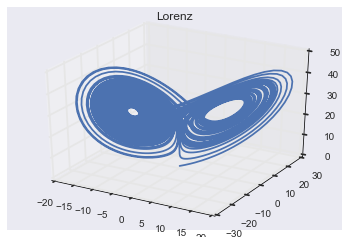

In [54]:
# パラメータの設定
p = 10
r = 28
b = 8/3
v0 = [0.1, 0.1, 0.1]
t = np.arange(0, 100, 0.01)

# 関数の呼び出し
v = odeint(lorenz_func, v0, t, args=(p, r, b))

# 可視化
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(v[:, 0], v[:, 1], v[:, 2])

# ラベルなど
plt.title("Lorenz")
plt.grid(True)

>[参照URL]

>ローレンツ方程式（英語）：https://en.wikipedia.org/wiki/Lorenz_system  
>ローレンツ方程式（日本語):https://ja.wikipedia.org/wiki/%E3%83%AD%E3%83%BC%E3%83%AC%E3%83%B3%E3%83%84%E6%96%B9%E7%A8%8B%E5%BC%8F

>Pythonとローレンツ方程式：http://org-technology.com/posts/ordinary-differential-equations.html

>[参考URL]

>Scipyの積分と微分方程式計算：https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html


#### <練習問題 1>
以下の積分を求めてみましょう。

\begin{eqnarray}
  \int_0^2 (x+1)^2 dx
\end{eqnarray}

#### <練習問題 2>
cos関数の範囲$(0,\pi)$の積分を求めてみましょう。

### 5.3.4 最適化
キーワード：最適化、二分法、ブレント法、ニュートン法、optimize

最後に、最適化計算（線形計画法）のメソッドについて学びましょう。また、方程式の解を求める処理も紹介していきます。最適化計算は、optimizeを使います。

In [55]:
from scipy.optimize import fsolve

まずは、具体例として次の2次関数について、$f(x)$が0になる$x$を考えてみましょう。もちろん、解の公式で解くことができますが、Scipyのoptimizeの使い方を覚えるために、optimizeを使って解いてみます。

\begin{eqnarray*}
\ f(x) = 2x^2 + 2x -10
\end{eqnarray*}

該当の関数を以下のように宣言します。

In [56]:
def f(x):
    y = 2 * x**2 + 2 * x - 10
    return y

グラフ化してみましょう。

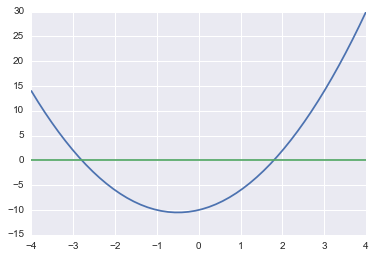

In [57]:
# グラフ化してみる
x = np.linspace(-4,4)
plt.plot(x,f(x))
plt.plot(x,np.zeros(len(x)))
plt.grid(True)

グラフから解は1と-2付近にあることがわかりますので、以下のような計算をさせると、解を算出してくれます。

In [58]:
# x = 1 付近
x = fsolve(f,1)
print(x)

[ 1.791]


In [59]:
# x = -2 付近
x = fsolve(f,-2)
print(x)

[-2.791]


この章の最後に、次の最適化問題を考えてみましょう。(s.tはsubject to)

\begin{eqnarray*}
\min x_1x_4(x_1+x_2+x_3)+x_3 
\\
s.t. \ x_1x_2x_3x_4 \ge 25
\\
1\le x_1,x_2,x_3,x_4 \le 5
\\
x_0 = (1,5,5,1)
\\
40-(x_1^2+ x_2^2+ x_3^2+ x_4^2) \ge 0
\end{eqnarray*}

上記は、minの後に書いていある関数を最小化するのですが、s.t.の後に条件式がいくつか書いてあります。これらの条件のもとで、最小値を求めていきます。minimizeを使いますので、以下のように実装します。

In [60]:
from scipy.optimize import minimize

次に、目的となる関数

\begin{eqnarray*}x_1x_4(x_1+x_2+x_3)+x_3 \end{eqnarray*}

をコーディングします。

In [61]:
# 目的となる関数
def objective(x):
    x1 = x[0]
    x2 = x[1]
    x3 = x[2]
    x4 = x[3]
    return x1*x4*(x1+x2+x3)+x3


次に、s.t.以下にある制約条件をそれぞれコーディングします。

In [61]:
# 制約式その1
def constraint1(x):
    return x[0]*x[1]*x[2]*x[3]-25.0

# 制約式その2
def constraint2(x):
    sum_sq = 40
    for i in range(4):
        sum_sq = sum_sq - x[i]**2
    return sum_sq

In [62]:
# 初期値
x0 = [1,5,5,1]
print(objective(x0))

16


minimize利用のため、以下のように変数を作成します。typeがineqだったり、funがconstrain1だったり、各パラメータは上の初めの式を見ながら意味を理解してください。

In [63]:
b = (1.0,5.0)
bnds = (b,b,b,b)
con1 = {'type':'ineq','fun':constraint1}
con2 = {'type':'ineq','fun':constraint2}
cons = [con1,con2]

以下が最適化計算の実行結果を代入しています。メソッドのSLSQPはSequential Least SQuares Programmingの略で、逐次二次計画法です。パラメータが以下の通り、はじめに対象となる関数を設定し、条件式等を代入します。

In [64]:
sol = minimize(objective,x0,method='SLSQP',bounds=bnds,constraints=cons)

In [65]:
print(sol)

     fun: 17.01401724549506
     jac: array([ 14.572,   1.379,   2.379,   9.564])
 message: 'Optimization terminated successfully.'
    nfev: 30
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([ 1.   ,  4.743,  3.821,  1.379])


以上より、xが以下のような値をとるときに、関数は約17という最小値を取ることがわかりました。

In [82]:
print("Y:",sol.fun)
print("X:",sol.x)

Y: 17.0140172455
X: [ 1.     4.743  3.821  1.379]


これで、Scipyの単元は終了になります。お疲れ様でした。これらの概念をはじめて見た方には難しかったかもしれませんが、この章で扱った計算以外にもたくさんの科学的な計算方法（fft,統計関数stats,デジタル信号のフィルタなど）がありますので、上記で紹介したサイトや、以下のレクチャーノート（NumpyやMatplotlibも含む）などを参考にしてください。

>[参考URL]

>Scipy Lecture Notes: http://www.turbare.net/transl/scipy-lecture-notes/index.html

次の章では、Pandasを用いたデータハンドリングについてさらに学んでいきましょう。

#### <練習問題 1>
以下の関数が0となる解を求めましょう。

\begin{eqnarray*}
\ f(x) = 5x -10
\end{eqnarray*}

#### <練習問題 2>
以下の関数が0となる解を求めましょう。

\begin{eqnarray*}
\ f(x) = x^3 - 2x^2 - 11x +12
\end{eqnarray*}

## 5.4 総合問題

### 5.4.1 総合問題1

以下の行列に対して、コレスキー分解を活用して、$Ax=b$の方程式を解いてください。

In [66]:
A = np.array([[5, 1, 0, 1],
              [1, 9, -5, 7],
              [0, -5, 8, -3],
              [1, 7, -3, 10]])
b = np.array([2, 10, 5, 10])

### 5.4.2 総合問題2

$0≤ x ≤ 1$、0≤y≤1−x の三角領域で定義される以下の関数の積分値を求めてみましょう。
\begin{eqnarray}
  \int_0^1 \int_0^{1-x} 1/(\sqrt{(x+y)}(1+x+y)^2) dy dx 
\end{eqnarray}


### 5.4.3 総合問題3

以下の最適化問題をSicpyを使って解いてみましょう。

\begin{eqnarray*}
\ min \ f(x) = x^2+1
\\  s.t. x \ge -1
\end{eqnarray*}